# web scrapping 

## getting the data from the web page

the target web page is https://eg.hatla2ee.com/en/car/all-prices/
(I need to get the data from multiple pages)

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
page_list = []
for i in range(1,16):
    url = r'https://eg.hatla2ee.com/en/car/all-prices/page/' + str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text , 'html')
    
    page_list.append(soup)

[<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html dir="ltr" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="https://media.hatla2eestatic.com/uploads/og/new_car_price/up_6bd97ca8356bcd021d28fdfe48978bfa.png" name="og:image"/>
<meta content="Latest official car prices in Egypt 2024, All brands and models in Egypt, specifications, images and availability in showrooms quickly and easily through our car market the best free service for buying and selling cars. find also Used Car Prices" name="description"/>
<meta content="New cars prices Egypt 2023 - 2024 (Official Prices)" name="title"/>
<title>New cars prices Egypt 2023 - 2024 (Official Prices) : Hatla2ee</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="231331426909240" property="fb:admins"/>
<meta content="34172
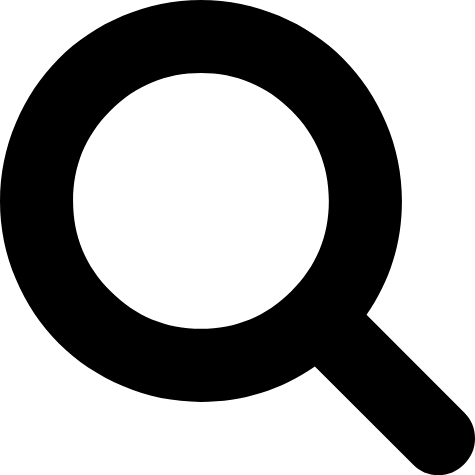

In [4]:
print(page_list)

## getting the needed table from the soup

In [6]:
tables_list = [page.find('table') for page in page_list]
print(tables_list)

[<table>
<thead>
<tr>
<th>Model</th>
<th>Property</th>
<th>power</th>
<th>Official Price </th>
<th class="textCenter">
<span style="color: #f14545">
Market Price </span>
</th>
</tr>
</thead>
<tbody>
<tr>
<td>
<a href="/en/new-car/hyundai/tucson">
Hyundai Tucson 2023 </a>
</td>
<td>A/T / COLLECTOR</td>
<td>1600 CC
Turbo </td>
<td>
<div class="numbers_item_availability flexer flexer_row flexer_ai_center">
<i class="material-icons" style="font-size:16px;color: #f36b6b">error</i>
<small style="color: #f36b6b">Car not available</small>
</div>
</td>
<td class="textCenter">
</td>
</tr>
<tr>
<td>
<a href="/en/new-car/lotus/Emeya">
Lotus Emeya 2024 </a>
</td>
<td>Automtic</td>
<td>0 CC
Turbo </td>
<td>
<div class="numbers_item_availability flexer flexer_row flexer_ai_center">
<i class="material-icons" style="font-size:16px;color: #f36b6b">error</i>
<small style="color: #f36b6b">Car not available</small>
</div>
</td>
<td class="textCenter">
</td>
</tr>
<tr>
<td>
<a href="/en/new-car/hyundai/tucs

## getting table titles

In [7]:
table_titles = tables_list[0].find_all('th')
table_titles = [title.text for title in table_titles]

In [8]:
table_titles

['Model', 'Property', 'power', 'Official Price ', '\n\nMarket Price \n']

In [16]:
import pandas as pd

df = pd.DataFrame(columns= table_titles)
df

,Model,Property,power,Official Price,\n\nMarket Price \n


## getting table data

In [17]:
for table in tables_list:
    table_data = table.find_all('tr')
    for row in table_data[1:]:
        row_data = row.find_all('td')
        individual_row_data = [data.text.strip() for data in row_data]

        df.loc[len(df)] = individual_row_data

In [18]:
df.head(10)

,Model,Property,power,Official Price,\n\nMarket Price \n
0,Hyundai Tucson 2023,A/T / COLLECTOR,1600 CC\nTurbo,error\nCar not available,
1,Lotus Emeya 2024,Automtic,0 CC\nTurbo,error\nCar not available,
2,Hyundai Tucson 2023,A/T / Shadow,1600 CC\nTurbo,error\nCar not available,
3,Hyundai Tucson 2024,A/T / Shadow,1600 CC\nTurbo,error\nCar not available,"1,750,000 EGP To 2,050,000 EGP"
4,Lotus Eletre 2024,Automtic,0 CC\nTurbo,error\nCar not available,
5,Hyundai Tucson 2023,A/T / Blaze,1600 CC\nTurbo,error\nCar not available,
6,Hyundai Tucson 2023,A/T / Redine,1600 CC\nTurbo,error\nCar not available,
7,Hyundai Tucson 2023,A/T / NIGHT,1600 CC\nTurbo,error\nCar not available,
8,Hyundai Tucson 2023,A/T / MID-NIGHT,1600 CC\nTurbo,error\nCar not available,
9,Hyundai Tucson 2023,A/T / BLACK DIAMOND,1600 CC\nTurbo,error\nCar not available,


In [19]:
len(df)

729

remove \n from the data

In [23]:
def remove_n(a):
    return a.replace('\n' , ' ')

for column in df.columns:
    df[column] = df[column].apply(remove_n)
    
df.columns = ['Model' , 'Property' , 'power' , 'Official Price' , 'Market Price']
df.head(10)

,Model,Property,power,Official Price,Market Price
0,Hyundai Tucson 2023,A/T / COLLECTOR,1600 CC Turbo,error Car not available,
1,Lotus Emeya 2024,Automtic,0 CC Turbo,error Car not available,
2,Hyundai Tucson 2023,A/T / Shadow,1600 CC Turbo,error Car not available,
3,Hyundai Tucson 2024,A/T / Shadow,1600 CC Turbo,error Car not available,"1,750,000 EGP To 2,050,000 EGP"
4,Lotus Eletre 2024,Automtic,0 CC Turbo,error Car not available,
5,Hyundai Tucson 2023,A/T / Blaze,1600 CC Turbo,error Car not available,
6,Hyundai Tucson 2023,A/T / Redine,1600 CC Turbo,error Car not available,
7,Hyundai Tucson 2023,A/T / NIGHT,1600 CC Turbo,error Car not available,
8,Hyundai Tucson 2023,A/T / MID-NIGHT,1600 CC Turbo,error Car not available,
9,Hyundai Tucson 2023,A/T / BLACK DIAMOND,1600 CC Turbo,error Car not available,


## Save CSV file

In [25]:
df.to_csv('Car prices in egypt Egypt.csv' , index=False)